In [1]:
from IPython.display import SVG, display

import sys
# sys.path.append('..') # uncomments and adjust if your Boxes.py copy in not in the Python path
from boxes import *

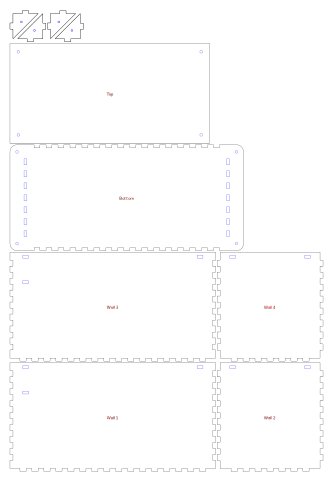

In [3]:
class ElectronicsWifiBox(Boxes):
    """Closed box with screw on top and mounting holes"""

    ui_group = "Box"

    def __init__(self) -> None:
        Boxes.__init__(self)
        self.addSettingsArgs(edges.FingerJointSettings)
        self.buildArgParser("x", "y", "h", "outside")
        self.argparser.add_argument(
            "--triangle", action="store", type=float, default=25.,
            help="Sides of the triangles holding the lid in mm")
        self.argparser.add_argument(
            "--d1", action="store", type=float, default=2.,
            help="Diameter of the inner lid screw holes in mm")
        self.argparser.add_argument(
            "--d2", action="store", type=float, default=3.,
            help="Diameter of the lid screw holes in mm")
        self.argparser.add_argument(
            "--d3", action="store", type=float, default=3.,
            help="Diameter of the mounting screw holes in mm")
        self.argparser.add_argument(
            "--outsidemounts", action="store", type=boolarg, default=True,
            help="Add external mounting points")
        self.argparser.add_argument(
            "--holedist", action="store", type=float, default=7.,
            help="Distance of the screw holes from the wall in mm")

    def wallxCB(self):
        t = self.thickness
        self.fingerHolesAt(0, self.h-1.5*t, self.triangle, 0)
        self.fingerHolesAt(0, self.h-10*t, self.triangle, 0)

        self.fingerHolesAt(self.x, self.h-1.5*t, self.triangle, 180)

    def wallyCB(self):
        t = self.thickness
        self.fingerHolesAt(0, self.h-1.5*t, self.triangle, 0)
        self.fingerHolesAt(self.y, self.h-1.5*t, self.triangle, 180)

    def render(self):

        t = self.thickness
        self.h = h = self.h + 2*t # compensate for lid
        x, y, h = self.x, self.y, self.h
        d1, d2, d3 =self.d1, self.d2, self.d3
        hd = self.holedist
        tr = self.triangle
        trh = tr / 3.

        if self.outside:
            self.x = x = self.adjustSize(x)
            self.y = y = self.adjustSize(y)
            self.h = h = h - 3*t

        self.rectangularWall(x, h, "fFeF", callback=[self.wallxCB],
                             move="right", label="Wall 1")
        self.rectangularWall(y, h, "ffef", callback=[self.wallyCB],
                             move="up", label="Wall 2")
        self.rectangularWall(y, h, "ffef", callback=[self.wallyCB],
                             label="Wall 4")
        self.rectangularWall(x, h, "fFeF", callback=[self.wallxCB],
                             move="left up", label="Wall 3")

        if not self.outsidemounts:
            self.rectangularWall(x, y, "FFFF", callback=[
            lambda:self.hole(hd, hd, d=d3)] *4, move="right",
            label="Bottom")
        else:
            self.flangedWall(x, y, edges="FFFF",
                             flanges=[0.0, 2*hd, 0., 2*hd], r=hd,
                             callback=[
                    lambda:self.hole(hd, hd, d=d3)] * 4, move='up',
                    label="Bottom")
        self.rectangularWall(x, y, callback=[
            lambda:self.hole(trh, trh, d=d2)] * 4, move='up', label="Top")

        self.rectangularTriangle(tr, tr, "ffe", num=4,
            callback=[None, lambda: self.hole(trh, trh, d=d1)])
        self.rectangularTriangle(tr, tr, "ffe", num=4,
            callback=[None, lambda: self.hole(trh, trh, d=d1)])
 
        

b = ElectronicsWifiBox()
b.parseArgs([
        '--reference=0',
        '--debug=0',
        '--x=200',
        '--outside=false'
        
    ])
b.open()
b.render()
data = b.close()

display(SVG(data=data.getvalue()))